# SciPy

_Numpy_ provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. **SciPy** builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

The best way to get familiar with SciPy is to browse the documentation (found at [https://docs.scipy.org/doc/scipy-1.1.0/reference/tutorial/index.html]). We will highlight some parts of SciPy that you might find useful for this class.

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab.

The additional benefit of basing SciPy on Python is that this also makes a powerful programming language available for use in developing sophisticated programs and specialized applications. Scientific applications using SciPy benefit from the development of additional modules in numerous niches of the software landscape by developers across the world. Everything from parallel programming to web and data-base subroutines and classes have been made available to the Python programmer. All of this power is available in addition to the mathematical libraries in SciPy.

This tutorial will acquaint the first-time user of SciPy with some of its most important features. It assumes that the user has already installed the SciPy package. Some general Python facility is also assumed, such as could be acquired by working through the Python distribution’s Tutorial. For further introductory help the user is directed to the Numpy documentation.

For brevity and convenience, we will often assume that the main packages (numpy, scipy, and matplotlib) have been imported as:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## SciPy Organization

SciPy is organized into subpackages covering different scientific computing domains. These are summarized in the following table:

| Subpackage | Description | 
| ------ | ---- |
| `cluster` | Clustering algorithms |
| `constants` | Physical and mathematical constants |
| `fftpack` | Fast Fourier Transform routines |
| `integrate` | Integration and ordinary differential equation solvers |
| `interpolate` | Interpolation and smoothing splines |
| `io` | Input and Output |
| `linalg` | Linear algebra |
| `ndimage` | N-dimensional image processing |
| `odr` | Orthogonal distance regression |
| `optimize` | Optimization and root-finding routines |
| `signal` | Signal processing |
| `sparse` | Sparse matrices and associated routines |
| `spatial` | Spatial data structures and algorithms |
| `special` | Special functions |
| `stats` | Statistical distributions and functions |

We will barely scratch the surface in terms of the huge expanse of libraries that **SciPy** offers, but it is recommended that each SciPy sub-package is imported separately, for example:

In [3]:
from scipy import linalg, optimize

## Integration

The `scipy.integrate` sub-package provides several integration techniques including an ordinary differential equation integrator. An overview of the module is provided by the `help` command:

In [4]:
from scipy import integrate

## General Integration (quad)

The function quad is provided to integrate a function of one variable between two points. The points can be ($\pm \infty$) to indicate infinite limits. For example, let's say you wish to integrate:

$$
I=\int_0^{\frac{\pi}{2}}cos(x)dx
$$

This can be trivially computed using `integrate.quad()`:

In [5]:
result = integrate.quad(lambda x: np.cos(x), 0, np.pi/2)
result

(0.9999999999999999, 1.1102230246251564e-14)

The first value represents the *integral*, as we would expect it is extremely close to $1$. The second value represents the *absolute error* estimate within the result, as SciPy computes the integral **numerically**.

If the function to integrate takes *additional parameters*, this can be provided for in the **args** argument. These parameters must be considered *constants*. Suppose that the following integral shall be calculated:

$$
I(a,b)=\int_0^1 ax^2 + b dx
$$

This is implemented as follows:

In [6]:
def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = integrate.quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

## General multiple integration

The mechanics for double and triple integration have been wrapped up into the functions `dblquad` and `tplquad`. These functions take the function to integrate and four, or six arguments, respectively. The limits of all inner integrals need to be defined as functions.

An example of using double integration to compute several values of $I_n$ is shown below:

In [7]:
def I(n):
    return integrate.dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)

print(I(2))
print(I(3))
print(I(4))

(0.4999999999985751, 1.3894083651858995e-08)
(0.33333333325010883, 1.3888461883425516e-08)
(0.2500000000043577, 1.2983033469368098e-08)


## Integration using samples

If we are working with data samples across some space, we can approximate an integral of both equally-spaced and arbitrarily-spaced samples using a variety of different methods. Two of the most common are `trapz` and `simps`:

In [8]:
x = np.array([1,3,4])
y = x**2
integrate.simps(y, x)

21.0

This corresponds exactly to:

$$
\int_1^4 x^2 dx=21
$$

whereas integrating the following:

In [9]:
y2 = x**3
integrate.simps(y2, x)

61.5

Doesn't correspond to:

$$
\int_1^4 x^3 dx = 63.75
$$

This is because Simpson's rule approximates the function between adjacent point as a parabola, as long as the function is a polynomial of order 2 or less with unequal spacing. Simpson's rule is more accurate than `trapz`, but `trapz` is considerably more reliable, as it interpolates *linearly* by integrating in small trapezoid parts along the sample space.

## Ordinary differential equations (ODEs)

Integrating a set of ordinary differential equations (ODEs) given initial conditions is another useful example. The function `odeint` is available in SciPy for integrating a first-order vector differential equation:

$$
\frac{d\dot{y}}{dt}=f(\dot{y},t)
$$

given initial conditions $\dot{y}(0)=y_0$, where $\dot{y}$ is a length $N$ vector and $f$ is a mapping from $\mathcal{R}^N$ to $\mathcal{R}^N$. A higher-order ordinary differential equation can always be reduced to a differential equation of this type by introducing intermediate derivatives into the $\dot{y}$ vector.

### Example

The second order differential equation for the angle theta of a pendulum acted on by gravity with friction can be written:

$$
\theta''(t) + b \theta'(t) + c \sin(\theta(t)) = 0
$$

where $b$ and $c$ are care positive constants, and a prime $'$ denotes a derivative. To solve this equation with `odeint`, we first convert it to a system of first-order equations. By defining angular velocity $\omega(t)=\theta'(t)$, we obtain the system:

$$
\begin{equation}
\theta'(t)=\omega(t) \\
\omega'(t)=-b \omega(t) - c \sin(\theta(t))
\end{equation}
$$

Let $y$ be the vector $[\theta, \omega]$. We implement this system in Python as:

In [10]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

We assume for the initial conditions, the pendulum is nearly vertical with $\theta(0)=\pi - 0.1$, and is initially at rest, so $\omega(0)=0$. Then the vector of initial conditions, with constants $b=0.25$ and $c=5.0$, is:



In [11]:
b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]

Now we generate a solution over a uniform-space sample set in the interval $t \in [0, 10]$:

In [12]:
t = np.linspace(0, 10, 101)

Calling `odeint` to generate the solution. We pass $b$ and $c$ to `odeint` using the *args* argument:

In [13]:
sol = integrate.odeint(pend, y0, t, args=(b,c))

In our solution, we have a $[101,2]$ array, whereby the first column is $\theta(t)$ and the second is $\omega(t)$. We plot as:

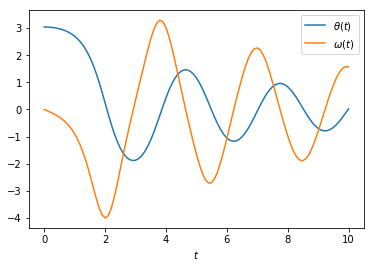

In [14]:
plt.plot(t, sol[:,0], label=r"$\theta(t)$")
plt.plot(t, sol[:,1], label=r"$\omega(t)$")
plt.xlabel(r"$t$")
plt.legend()
plt.show()

## Interpolation

There are several general interpolation facilities available in SciPy, for data in 1, 2, and higher dimensions.

The `interp1d` class in `scipy.interpolate` is a convenient method to create a function based on fixed data points which can be evaluated anywhere within the domain defined by the given data using linear interpolation.

In [15]:
from scipy import interpolate

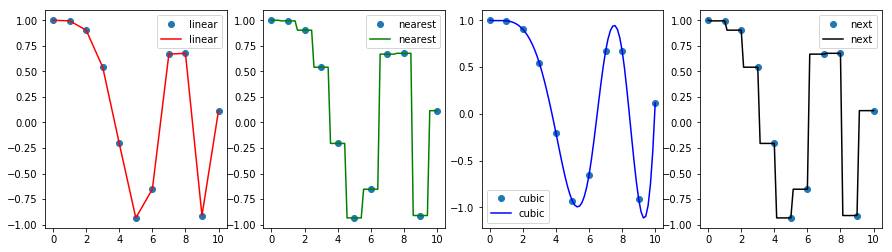

In [16]:
x = np.linspace(0, 10, 11, endpoint=True)
y = np.cos(-x**2/9.)
f = interpolate.interp1d(x, y)
f2 = interpolate.interp1d(x, y, kind="nearest")
f3 = interpolate.interp1d(x, y, kind="cubic")
f4 = interpolate.interp1d(x, y, kind="next")

xnew = np.linspace(0, 10, 71, endpoint=True)

fig,ax=plt.subplots(ncols=4, figsize=(15,4))
ax[0].plot(x, y, 'o', xnew, f(xnew), 'r-', label="linear")
ax[1].plot(x, y, 'o', xnew, f2(xnew), 'g-', label="nearest")
ax[2].plot(x, y, 'o', xnew, f3(xnew), 'b-', label="cubic")
ax[3].plot(x, y, 'o', xnew, f4(xnew), 'k-', label="next")
for a in ax:
    a.legend()
plt.show()

### Multivariate data interpolation

Suppose you have multidimensional data, for instance for an underlying function $f(x, y)$ you only know the values at points ($x[i]$, $y[i]$) that do not form a regular grid.

Suppose we want to interpolate the 2-D function:

In [17]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

but we only know its values at 1000 data points:

In [18]:
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

This can be done with `griddata` – below we try out all of the interpolation methods:

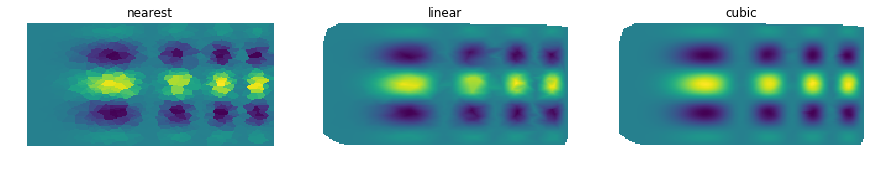

In [19]:
grid_z0 = interpolate.griddata(points, values, (grid_x, grid_y), method="nearest")
grid_z1 = interpolate.griddata(points, values, (grid_x, grid_y), method="linear")
grid_z2 = interpolate.griddata(points, values, (grid_x, grid_y), method="cubic")

fig, ax = plt.subplots(ncols=3, figsize=(15,4))

for i,p in enumerate([grid_z0, grid_z1, grid_z2]):
    ax[i].imshow(p)
for i,c in enumerate(["nearest","linear","cubic"]):
    ax[i].set_title(c)
    ax[i].axis("off")

### Spline interpolation

Spline interpolation requires two essential steps: (1) a spline representation of the curve is computed, and (2) the spline is evaluated at the desired points. In order to find the spline representation, there are two different ways to represent a curve and obtain (smoothing) spline coefficients: directly and parametrically. The direct method finds the spline representation of a curve in a two- dimensional plane using the function `splrep`:

In [20]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s = 0)
tck

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  1.57079633,
         2.35619449,  3.14159265,  3.92699082,  4.71238898,  6.28318531,
         6.28318531,  6.28318531,  6.28318531]),
 array([  3.44265545e-18,   5.54608516e-01,   1.21921009e+00,
          7.83113675e-01,   2.45205789e-16,  -7.83113675e-01,
         -1.21921009e+00,  -5.54608516e-01,  -2.44929360e-16,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]),
 3)

The keyword argument, s , is used to specify the amount of smoothing to perform during the spline fit. The default value of $s$ is $s=m-\sqrt{2m}$ where $m$ is the number of data points being fit. Thus if no smoothing is desired $s=0$.

Once the spline representation of the data has been determined, functions are available for evaluating the spline (`splev`) and its derivatives (`splev`, `spalde`) at any point and the integral of the spline between any two points ( `splint`):

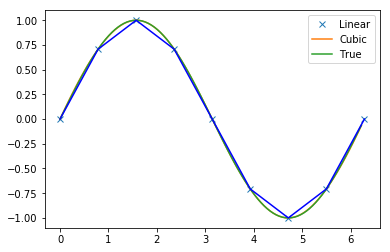

In [21]:
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(["Linear","Cubic","True"])

## Multidimensional image processing

Image processing and analysis are generally seen as operations on two-dimensional arrays of values. There are however a number of fields where images of higher dimensionality must be analyzed. Good examples of these are **medical imaging** and **biological imaging**. `numpy` is suited very well for this type of applications due its inherent multidimensional nature. The `scipy.ndimage` packages provides a number of general image processing and analysis functions that are designed to operate with arrays of arbitrary dimensionality. The packages currently includes functions for linear and non-linear filtering, binary morphology, B-spline interpolation, and object measurements.

To access this functionality, we import the `ndimage` package:

In [22]:
from scipy import ndimage

### Importing images from file

Creating a numpy array from an image file:

(560, 1000, 3) uint8


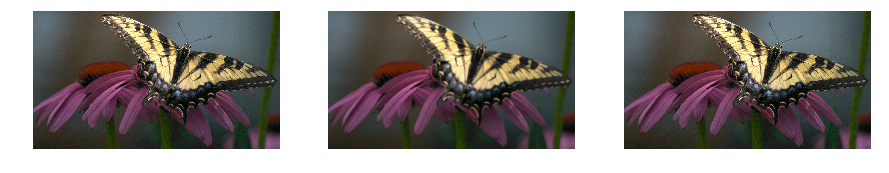

In [25]:
fig,ax=plt.subplots(ncols=3, figsize=(15,5))

fly = plt.imread("../butterfly.jpg")
print(fly.shape, fly.dtype)
ax[0].imshow(fly)
for a in ax:
    a.axis("off")
# different interpolations
ax[1].imshow(fly, interpolation="bilinear")
ax[2].imshow(fly, interpolation="nearest")
plt.show()

### Basic Manipulations

Including **masking** and **rotation**:

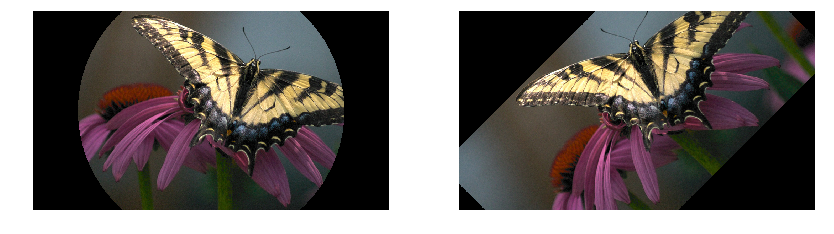

In [26]:
# create a copy to manipulate
porthole_fly = fly.copy()

lx, ly, lz = fly.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) **2 + (Y - ly / 2) **2 > lx * ly / 4

porthole_fly[mask,:] = 0

fig,ax=plt.subplots(ncols=2, figsize=(14,5))

ax[0].imshow(porthole_fly)
ax[0].axis("off")

fly_rot = ndimage.rotate(fly, 45, reshape=False)
ax[1].imshow(fly_rot)
ax[1].axis("off")
plt.show()

### Blurring/Smoothing

Note that this has selected only on the *gray* channel:

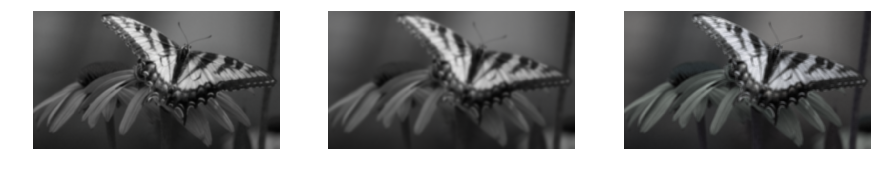

In [27]:
blurred = ndimage.gaussian_filter(fly, sigma=3)
very_blurred = ndimage.gaussian_filter(fly, sigma=5)
unif_fly = ndimage.uniform_filter(fly, size=11)

fig,ax=plt.subplots(ncols=3, figsize=(15,7))
for a in ax:
    a.axis("off")
ax[0].imshow(blurred)
ax[1].imshow(very_blurred)
ax[2].imshow(unif_fly)
plt.show()

### Sharpening

To sharpen an image, we apply a blurring filter and then remove the gaussian filter from the image:

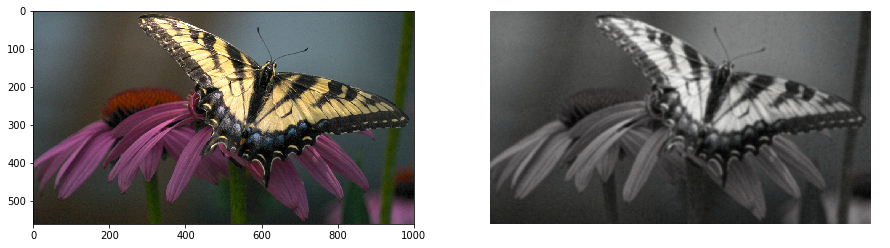

In [28]:
filter_blurred = ndimage.gaussian_filter(blurred, 1)
# select an alpha
alpha = 5
sharpened = blurred + alpha * (blurred - filter_blurred)

fig,ax=plt.subplots(ncols=2, figsize=(15,7))
ax[0].imshow(fly)
ax[1].imshow(sharpened)
plt.axis("off")
plt.show()

### Edge Detection

We can use a **gradient operator** (Sobel) to find high intensity variations:

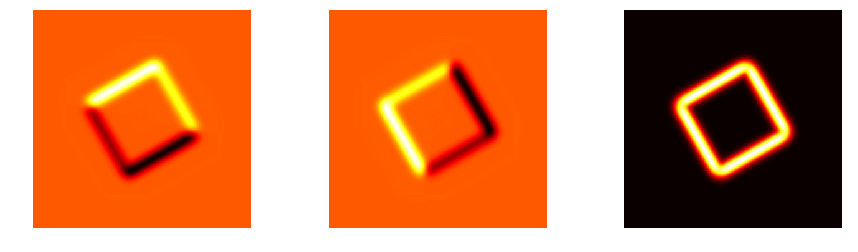

In [29]:
sq = np.zeros((256,256))
sq[64:-64, 64:-64] = 1
sq = ndimage.rotate(sq, 30, mode="constant")
sq = ndimage.gaussian_filter(sq, 8)

sx = ndimage.sobel(sq, axis=0, mode="constant")
sy = ndimage.sobel(sq, axis=1, mode="constant")
sob = np.hypot(sx, sy)

fig, ax=plt.subplots(ncols=3, figsize=(15,4))
for a in ax:
    a.axis("off")
for i,p in enumerate([sx, sy, sob]):
    ax[i].imshow(p, cmap="hot")

There is substantially more that can be found with processing images, however the scope of this session is just to cover some basic operations to show how things can be done.

## Sparse Matrices

Normal matrices are 2-D objects that store numerical values, and every value is stored in memory in a contiguous chunk. This provides benefits such as very fast access to individual items, but what about when most of the data values are null?

We can use `scipy.sparse` for a selection of different strategies for representing **sparse** data, and it even helps when we have cases where memory grows exponentially.

Sparse matrices act to *compress* the data to save memory usage, by not representing zero values. Applications include:

- solution to partial differential equations (finite elements etc.)
- graph theory (nodes and edges)

Sparsity can be visualised with `matplotlib` using `plt.spy`:

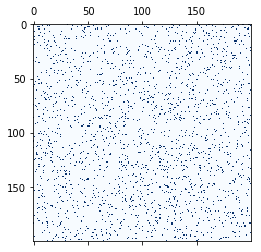

In [30]:
X_sp = np.random.choice([0, 1], size=(200,200), p=[.95, .05])
plt.spy(X_sp, cmap="Blues")
plt.show()

Sparse matrices offer the data structure to store large, sparse matrices, and allows us to perform complex matrix computations. The ability to do such computations is incredibly powerful in a variety of data science problems. Learning to work with Sparse matrix, a large matrix or 2d-array with a lot elements being zero, can be extremely handy.

Python’s SciPy library has a lot of options for creating, storing, and operating with Sparse matrices. There are 7 different types of sparse matrices available.

1. __csc_matrix__: Compressed Sparse Column format
1. __csr_matrix__: Compressed Sparse Row format
1. __bsr_matrix__: Block Sparse Row format
1. __lil_matrix__: List of Lists format
1. __dok_matrix__: Dictionary of Keys format
1. __coo_matrix__: COOrdinate format
1. __dia_matrix__: DIAgonal format

The default type is the **csr_matrix**, and NumPy converts your sparse matrix to this format before it conducts arithmetic operations on it. The table below highlights the opportunities of each format:


| format | matrix `*` vector | get item | fancy get | set item | fancy set | solvers | note | 
| ------ | ---- | ------ | ---- | ------ | ---- | ------ | ---- |
| DIA | sparsetools | . | . | . | . | iterative | has data array, specialized |
| LIL | via CSR | yes | yes | yes | yes | iterative | arithmetics via CSR, incremental construction |
| DOK | python | yes | one axis only | yes | yes | iterative | O(1) item access, incremental construction |
| COO | sparsetools | . | . | . | . | iterative | has data array, facilitates fast conversion |
| CSR | sparsetools | yes | yes | slow | . | any | has data array, fast row-wise operations |
| CSC | sparsetools | yes | yes | slow | . | any | has data array, fast column-wise operations |
| BSR | sparsetools | . | . | . | . | specialized | has data array, specialized |


In [31]:
from scipy import sparse

**WARNING**: When multiplying `scipy.sparse` matrices, it acts as *matrix multiplication* (i.e dot product), not element-wise.

### Example

Here we will create a **lil_matrix**, assign some random numbers, convert to CSR and use `sparse.solve`:

In [32]:
dim_size = 10000
subsets = 1000
A = sparse.lil_matrix((dim_size,dim_size))
A[0, :subsets] = np.random.rand(subsets)
A[1, subsets:subsets*2] = np.random.rand(subsets)
A.setdiag(np.random.rand(dim_size))

In [33]:
A = A.tocsr()
b = np.random.rand(dim_size)
# solve using scipy.sparse.linalg
x = sparse.linalg.spsolve(A, b)
# solve non-sparse by converting A back to numpy!
x_ = np.linalg.solve(A.toarray(), b)
# error between methods
err = np.linalg.norm(x - x_)
print(err)

2.73485178372e-12


### CSC/CSR format

These are the best formats, as they allow for fast matrix-vector products and other arithmetics along the appropriate axis, in addition to efficient row/column slicing.

In [34]:
x = np.random.choice([0,1], size=(5,5), p=[.8, .2])
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [35]:
sparse.csc_matrix(x)

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Column format>

In [36]:
sparse.csr_matrix(x)

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

### Diagonal sparse matrices

This is natural, as a diagonal matrix is by definition mostly sparse, only containing non-zero values on the *diagonal* of the matrix.

In [37]:
sparse.dia_matrix(np.ones((10000,10000)))

/home/gparkes/anaconda3/lib/python3.6/site-packages/scipy/sparse/coo.py:421: SparseEfficiencyWarning: Constructing a DIA matrix with 19999 diagonals is inefficient
  "is inefficient" % len(diags), SparseEfficiencyWarning)


<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 100000000 stored elements (19999 diagonals) in DIAgonal format>

# Tasks

## Task 1

The force $F$ on an area $A$ at a depth $y$ in a liquid of density $w$ is given by:

$$
F=wyA
$$

Imagine this applied to a plate submerged vertically in a liquid.

The **total force** on the plate is given by:

$$
F=w\int_a^b xy \, \text{d}y
$$

where $x$ is the length (in m) of the element of area expressed in terms of $y$, $y$ is depth (in m) of the element of area, $w$ is the density of the liquid (in $Nm^{-3}$), $a$ is the depth at the top of the area (in m), and $b$ is the depth at the bottom of the area (in m).

Calculate the force on one side of a cubical container 10.0cm on an edge if the container is filled with water. The weight density of water is $w=9800Nm^{-3}$.

In [38]:
x = 10. / 100. # x is a constant because we are dealing with a cubical container.
a = 0. # plate rests at the surface of the water
w = 9800. # density of water
b = 10. / 100. # plate goes 10cm into water bowl

# function to integrate
def f(y, x):
    return x*y

F_int = integrate.quad(f, a, b, args=(x))
F = w * F_int[0]
print("Applying %.4fN force to plate." % F)

Applying 4.9000N force to plate.


### Task 2

Consider the motion of a spring that is subject to a frictional force or a damping force. An example is the damping force supplied by a shock absorber in a car or a bicycle. We assume that the damping force is proportion to the velocity of the mass and acts in the direction opposite to the motion. Thus:

$$
F_d=-c\frac{dx}{dt}
$$

where $c$ is a damping constant. Newton's second law thus gives:

$$
m\frac{d^2x}{dt^2}=F_r + F_d=-kx-c\frac{dx}{dt}
$$

which we re-arrange to:

$$
m\frac{d^2x}{dt^2}+c\frac{dx}{dt}+kx=0
$$

Solve the linear system of equations using `odeint`, with initial conditions $x(0)=0$ and $x'(0)=0.6$. Ensure that $m$, $c$ and $k$ are all positive constants, but initially test with $m=5$, $c=10$ and $k=128$. Create a timespace as $t \in [0, 10]$ with a sensible number of steps.

Once you done one run, try tweaking $m$ and $c$ and see the different plots you find.

Ensure that you plot both $x(t)$ and $x'(t)$.

In [39]:
m = 5.
c = 10.
k = 128.
t = np.linspace(0, 10, 100)
# initial conditions
x0 = [0., 0.6]
# convert to system of first-order differential equations

We set $\omega(t)=x'(t)$, so:

$$
\omega'(t)=\frac{-cx'(t)-kx(t)}{m}
$$

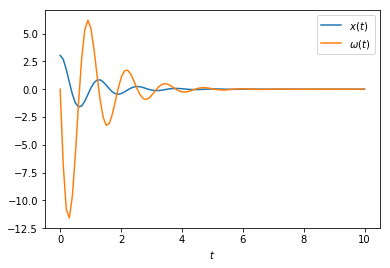

In [40]:
# function to diff.
def pend(y, t, m, c, k):
    x, omega = y
    dydt = [omega, (-c*omega - k*x) / m]
    return dydt

# create solution
sol = integrate.odeint(pend, y0, t, args=(m,c,k))

plt.plot(t, sol[:,0], label=r"$x(t)$")
plt.plot(t, sol[:,1], label=r"$\omega(t)$")
plt.xlabel(r"$t$")
plt.legend()
plt.show()

### Task 3

Import the image `bigcat.jpg`. Compute the laplace transformation from the method `laplace()` found in `ndimage`. Plot the image of the big cat and it's laplace transformation. How well does the image capture the big cat from the scenery?

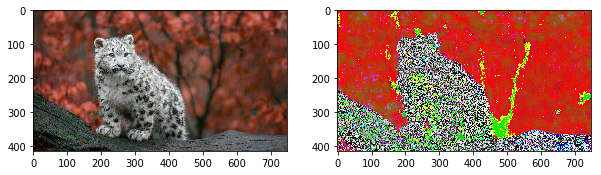

In [47]:
fig,axes=plt.subplots(ncols=2, figsize=(10,4))
A = plt.imread("../bigcat.jpg")
axes[0].imshow(A)
axes[1].imshow(ndimage.laplace(A))
plt.show()

### Task 4

Trying different $\sigma$, draw 9 laplace-transformed cats using 9 different values for in the logspace range of $\sigma \in [10^{-1}, 5]$, within a `gaussian_filter()`. Print the sigma at the top of each image.

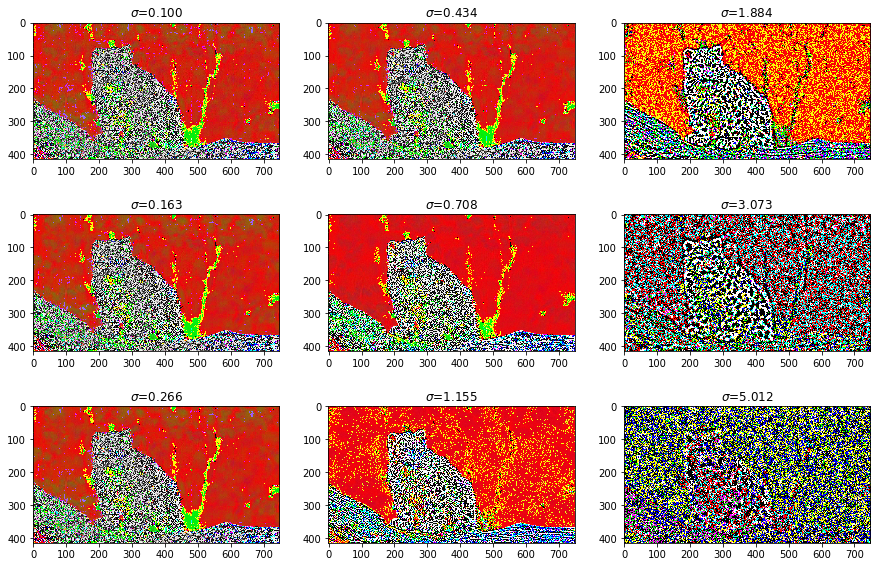

In [48]:
sigs = np.logspace(-1,0.7,9)
fig,ax = plt.subplots(ncols=3, nrows=3, figsize=(15,10))
for i,s in enumerate(sigs):
    ax[i%3,int(i/3)].imshow(ndimage.laplace(ndimage.gaussian_filter(A, s)))
    ax[i%3,int(i/3)].set_title(r"$\sigma$=%.3f" % s)

### Task 5

We can try to label groups of pixels in this image using `ndimage.label`, which accepts a boolean matrix. This boolean matrix which it tries to associate groups to can be generated by a number of ways; in this instance we will simply select points that are greater than the pixel mean across all pixels:

$$
B_{ij}=
\begin{cases}
1 & B_{ij} > \bar{B} \\
0 & B_{ij} \le \bar{B} 
\end{cases}
$$

Plot 3 images:
1. The labelled unfiltered image
2. The labelled laplacian-gaussian filtered image
3. The labelled sobel-filtered image

Sobel-filters can be generated using `ndimage.sobel`. You may choose to use a gaussian filter and/or laplace transform before using `sobel()`.

You may use any parameters to `gaussian_filter(sigma)` as necessary to get interesting results.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


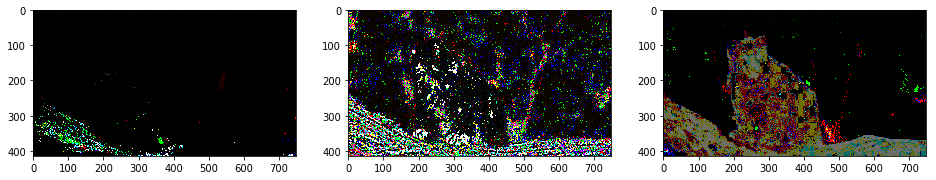

In [49]:
fig,ax = plt.subplots(ncols=3, figsize=(16,4))

a_set, _ = ndimage.label(A > A.mean())
ax[0].imshow(a_set)
b_mat = ndimage.laplace(ndimage.gaussian_filter(A, 2.2))
b_set, _ = ndimage.label(b_mat > b_mat.mean())
ax[1].imshow(b_set)
c_mat = ndimage.sobel(ndimage.laplace(ndimage.gaussian_filter(A, 1.8)))
c_set, _ = ndimage.label(c_mat > c_mat.mean())
ax[2].imshow(c_set)
plt.show()